# Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Preprocessing

**Read data**

In [2]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding='ISO-8859-1')

# Check the first few rows of the dataset
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [5]:
df.duplicated().sum()


0

In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
df['age']=df['age'].round(0)
df['age']=df['age'].astype('int32')
df['age'].head(10)

0    42
1    41
2    43
3    58
4    57
5    57
6    47
7    50
8    47
9    43
Name: age, dtype: int32

In [8]:
df['country'].value_counts().reset_index().sort_values(by='count',ascending=False)

,country,count
0,Israel,6
2,Bolivia,6
1,Mauritania,6
9,Bhutan,5
15,Armenia,5
...,...,...
175,Honduras,1
176,Mexico,1
177,Rwanda,1
178,Tonga,1


In [9]:
df['annual Salary']=df['annual Salary'].round(2)
df['annual Salary'].head()

0    62812.09
1    66646.89
2    53798.55
3    79370.04
4    59729.15
Name: annual Salary, dtype: float64

In [10]:
df["gender"].value_counts()

gender
1    253
0    247
Name: count, dtype: int64

In [11]:
df['credit card debt']=df['credit card debt'].round(2)
df['credit card debt'].head()

0    11609.38
1     9572.96
2    11160.36
3    14426.16
4     5358.71
Name: credit card debt, dtype: float64

In [12]:
df['net worth']=df['net worth'].round(2)
df['net worth'].head()

0    238961.25
1    530973.91
2    638467.18
3    548599.05
4    560304.07
Name: net worth, dtype: float64

# Data Visualization

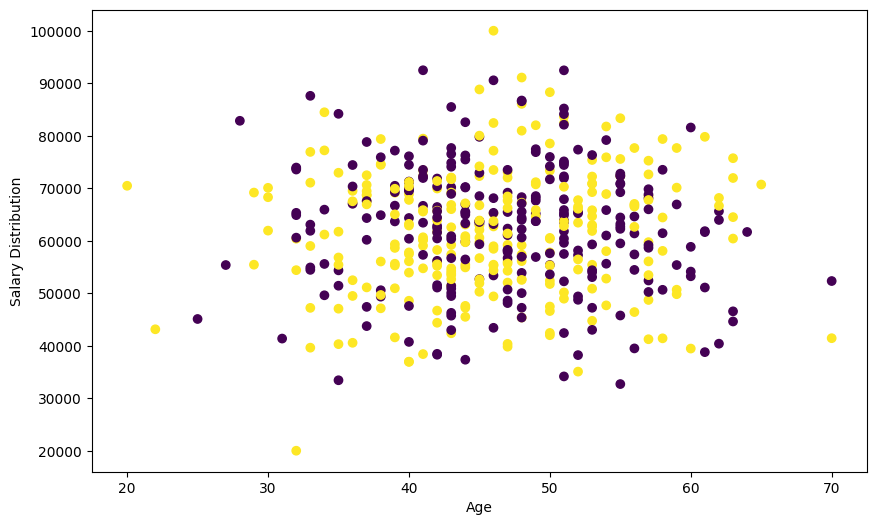

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data=df,x='age',y='annual Salary',c='gender')
plt.xlabel('Age')
plt.ylabel('Salary Distribution')
plt.show()

In [14]:
df.corr(numeric_only=True)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


# Applying ANN Model

In [15]:
df.drop(columns=['customer name',	'customer e-mail'	,'country'],inplace=True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09,11609.38,238961.25,35321.45877
1,0,41,66646.89,9572.96,530973.91,45115.52566
2,1,43,53798.55,11160.36,638467.18,42925.70921
3,1,58,79370.04,14426.16,548599.05,67422.36313
4,1,57,59729.15,5358.71,560304.07,55915.46248


In [16]:
X = df.drop('car purchase amount',axis=1)
y = df['car purchase amount']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
SS

StandardScaler()

In [19]:
X_test=SS.fit_transform(X_test)

In [20]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['mse'])

In [21]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 44073.4219 - mse: 2056681984.0000 - val_loss: 42925.0234 - val_mse: 1938647808.0000
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43921.9492 - mse: 2052711936.0000 - val_loss: 42923.1641 - val_mse: 1938489344.0000
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43930.3594 - mse: 2057478144.0000 - val_loss: 42919.6289 - val_mse: 1938188032.0000
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44541.7188 - mse: 2109642112.0000 - val_loss: 42913.0195 - val_mse: 1937625088.0000
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44479.5117 - mse: 2108373760.0000 - val_loss: 42901.2812 - val_mse: 1936624384.0000
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44411.8984 - mse: 2098649344.0000 - val_loss: 42881.6562 - val_mse: 1934948096.0000
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43402.5664 - mse: 2004786048.0000 - val_loss: 42850.4414 - val_mse: 1932283520.000

# Evaluation

Text(0, 0.5, 'Loss')

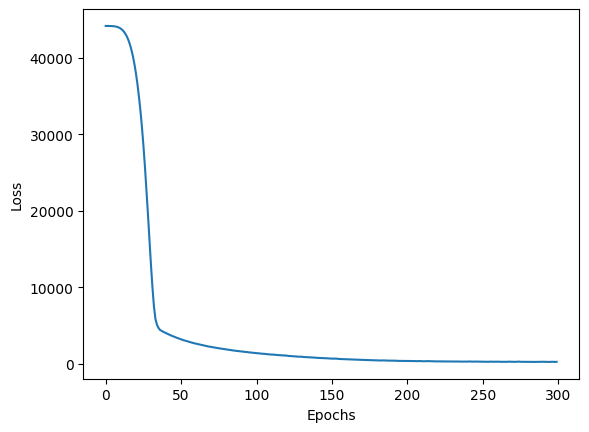

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [23]:
model.save('model.h5')